# Introduction

In this project, we are going to apply the K-Means clustering to solve for the following problems:

- How has the price of rice changed in different regions over time? 
- Which regions experience the most volatile rice prices? 
- Is there an existing seasonal pattern in rice price volatility? 

The [dataset](https://data.humdata.org/dataset/wfp-food-prices-for-philippines), sourced from the World Food Programme Price Database, offers an in-depth look at food prices in the Philippines. Covering key staples such as maize, rice, beans, fish, and sugar, it serves as a valuable tool for analyzing the dynamics of the nation’s food economy.


| **Column Name** | **Description** |
|------------------|-----------------|
| `date`           | The date when the food price was recorded. Helps track trends over time. |
| `admin1`         | The first-level administrative region (e.g., province or region like "Metro Manila"). |
| `admin2`         | The second-level administrative region (e.g., city or municipality within a province). |
| `market`         | The name of the specific market where the price was observed. |
| `latitude`       | Geographic latitude of the market. Useful for mapping and regional analysis. |
| `longitude`      | Geographic longitude of the market. |
| `category`       | Broad classification of the food (e.g., cereals, meats, legumes). |
| `commodity`      | Specific food item being priced (e.g., "Rice (local)", "Sugar", "Tilapia"). |
| `unit`           | The unit of measurement for the price (e.g., "kg", "piece", "liter"). |
| `priceflag`      | Indicates how the price was obtained: `"actual"` (directly recorded) or `"aggregate"` (averaged or estimated). |
| `pricetype`      | Type of market price: typically `"retail"` or `"wholesale"`. |
| `currency`       | Currency in which the price is reported — usually `"Philippine Peso"`. |
| `price`          | The reported price of the commodity in the local currency and unit. |
| `usdprice`       | The same price converted to USD (based on exchange rates at the time). |

In [3]:
import pandas as pd

pd.set_option('display.max_columns', 500)
food_prices_data = pd.read_csv("wfp_food_prices_phl.csv", skiprows=[1])

# Data Cleaning and Exploration

In [4]:
# Number of data and features 
print(food_prices_data.shape)
print(len(str(food_prices_data.shape))*'-')

# Check how many types of data are in the dataset
print(food_prices_data.dtypes.value_counts())
print(len(str(food_prices_data.shape))*'-')

# Check the first 16 columns
food_prices_data.head(16)

(198764, 16)
------------
object     10
float64     4
int64       2
Name: count, dtype: int64
------------


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,Maize flour (yellow),573,KG,actual,Retail,PHP,15.00,0.37
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Retail,PHP,20.00,0.49
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Wholesale,PHP,18.35,0.45
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,"Rice (regular, milled)",80,KG,actual,Retail,PHP,18.00,0.44
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,"Rice (regular, milled)",80,KG,actual,Wholesale,PHP,16.35,0.40
5,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,"meat, fish and eggs",Meat (pork),140,KG,actual,Retail,PHP,105.37,2.60
6,2000-01-15,Region III,Nueva Ecija,Palayan,171,15.54,121.08,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Retail,PHP,19.00,0.47
7,2000-01-15,Region III,Nueva Ecija,Palayan,171,15.54,121.08,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Wholesale,PHP,18.00,0.44
8,2000-01-15,Region III,Nueva Ecija,Palayan,171,15.54,121.08,cereals and tubers,"Rice (regular, milled)",80,KG,actual,Retail,PHP,18.10,0.45
9,2000-01-15,Region III,Nueva Ecija,Palayan,171,15.54,121.08,"meat, fish and eggs",Meat (pork),140,KG,actual,Retail,PHP,77.00,1.90


### Check for Missing Values

In [5]:
food_prices_data.isnull().sum()

date            0
admin1          0
admin2          0
market          0
market_id       0
latitude        0
longitude       0
category        0
commodity       0
commodity_id    0
unit            0
priceflag       0
pricetype       0
currency        0
price           0
usdprice        0
dtype: int64

### Check Column Values

In [6]:
commodity_counts = food_prices_data["commodity"].value_counts().reset_index()
commodity_counts.columns = ["commodity", "count"]
print(commodity_counts.to_string(index=False))


                          commodity  count
             Rice (regular, milled)   8781
                        Meat (pork)   7052
                           Tomatoes   6566
                            Carrots   6530
                            Cabbage   6344
      Meat (beef, chops with bones)   6029
              Meat (chicken, whole)   5857
                       Onions (red)   5737
                               Eggs   5638
                   Potatoes (Irish)   5435
                 Rice (well milled)   4838
                          Eggplants   4833
                    Fish (milkfish)   4630
                       Bitter melon   4584
                     Rice (special)   4523
                   Fish (roundscad)   4433
                            Coconut   4338
            Meat (pork, with bones)   4322
                     Fish (tilapia)   4195
                        Meat (beef)   4037
                       Beans (mung)   4035
                  Bananas (lakatan)   3941
           

In [7]:
food_prices_data["currency"].value_counts()

currency
PHP    198764
Name: count, dtype: int64

### Filter Unnecessary Data

In [8]:
food_prices_data = food_prices_data.drop(columns=["category", "currency"])

food_prices_data.head()

,date,admin1,admin2,market,market_id,latitude,longitude,commodity,commodity_id,unit,priceflag,pricetype,price,usdprice
0,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.6,120.98,Maize flour (yellow),573,KG,actual,Retail,15.00,0.37
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.6,120.98,"Rice (milled, superior)",593,KG,actual,Retail,20.00,0.49
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.6,120.98,"Rice (milled, superior)",593,KG,actual,Wholesale,18.35,0.45
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.6,120.98,"Rice (regular, milled)",80,KG,actual,Retail,18.00,0.44
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.6,120.98,"Rice (regular, milled)",80,KG,actual,Wholesale,16.35,0.40


Since we will only be focusing on rice prices, the category column is unnecessary because we will only have 1 category. Currency will also be removed since all valUes in price column are in PHP

### Change Data Types

Convert price, latitude, and longitude to numbers, and date to datetime format. Invalid entries are safely turned into NaN or NaT using errors="coerce". 

In [9]:
food_prices_data["price"] = pd.to_numeric(food_prices_data["price"], errors="coerce")
food_prices_data["latitude"] = pd.to_numeric(food_prices_data["latitude"], errors="coerce")
food_prices_data["longitude"] = pd.to_numeric(food_prices_data["longitude"], errors="coerce")
food_prices_data["date"] = pd.to_datetime(food_prices_data["date"], errors="coerce")

print(food_prices_data.dtypes.value_counts())

object            7
float64           4
int64             2
datetime64[ns]    1
Name: count, dtype: int64


### Filter Rice From Commodities

In [10]:
all_rice_df = food_prices_data[food_prices_data["commodity"].str.startswith("Rice", na=False)]

all_rice_df["commodity"].value_counts()



commodity
Rice (regular, milled)     8781
Rice (well milled)         4838
Rice (special)             4523
Rice (milled, superior)    2850
Rice (paddy)                664
Rice (premium)              620
Name: count, dtype: int64

Since we only need rice commodities, we need to filter out all data that aren't rice

In [11]:
all_rice_df = all_rice_df[(all_rice_df['date'] >= '2018-01-01') & (all_rice_df['date'] <= '2025-12-31')]

all_rice_df.shape

(15734, 14)

All data entries must be between 2018 - 2025

In [12]:
all_rice_df["admin1"].value_counts()


admin1
Region III                              1371
Region VI                               1191
Region V                                1166
Region VIII                             1125
Cordillera Administrative region        1045
Region IV-A                              996
Region XI                                972
Region X                                 965
Region IV-B                              951
Region XIII                              934
Region VII                               816
Region XII                               815
Autonomous region in Muslim Mindanao     812
Region II                                788
Region I                                 781
Region IX                                719
National Capital region                  287
Name: count, dtype: int64

In [13]:
all_rice_df["admin2"].value_counts()


admin2
Davao del Sur        511
Bulacan              370
Zamboanga del Sur    369
Masbate              362
Iloilo               312
                    ... 
Ifugao               134
Sarangani            133
Compostela Valley    130
Sulu                  67
Camarines Sur         18
Name: count, Length: 79, dtype: int64

In [14]:
all_rice_df["market"].value_counts()

market
Metro Manila       287
Davao City         246
Bulacan            185
Pampanga           185
Cagayan            185
                  ... 
Puerto Princesa     27
Calapan City        19
Shariff Aguak       18
Naga City           18
La Trinidad         17
Name: count, Length: 108, dtype: int64

In [15]:
all_rice_df["pricetype"].value_counts()

pricetype
Retail       15325
Wholesale      409
Name: count, dtype: int64

In [16]:
all_rice_df["unit"].value_counts()

unit
KG    15734
Name: count, dtype: int64

In [17]:
all_rice_df["priceflag"].value_counts()

priceflag
actual              15118
aggregate             522
actual,aggregate       94
Name: count, dtype: int64

In [18]:
all_rice_df.head(30)

,date,admin1,admin2,market,market_id,latitude,longitude,commodity,commodity_id,unit,priceflag,pricetype,price,usdprice
27749,2018-01-15,Autonomous region in Muslim Mindanao,Maguindanao,Shariff Aguak,183,6.86,124.44,"Rice (regular, milled)",80,KG,actual,Retail,39.20,0.78
27766,2018-01-15,Cordillera Administrative region,Benguet,La Trinidad,168,16.45,120.59,"Rice (regular, milled)",80,KG,actual,Retail,35.74,0.71
27785,2018-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,"Rice (milled, superior)",593,KG,actual,Retail,42.13,0.84
27786,2018-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,"Rice (milled, superior)",593,KG,actual,Wholesale,38.11,0.76
27787,2018-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,"Rice (regular, milled)",80,KG,actual,Retail,37.43,0.74
27788,2018-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,"Rice (regular, milled)",80,KG,actual,Wholesale,38.02,0.76
27803,2018-01-15,Region I,Pangasinan,Lingayen,169,16.02,120.23,"Rice (regular, milled)",80,KG,actual,Retail,36.76,0.73
27804,2018-01-15,Region I,Pangasinan,Lingayen,169,16.02,120.23,"Rice (regular, milled)",80,KG,actual,Wholesale,35.00,0.70
27824,2018-01-15,Region II,Cagayan,Tuguegarao City,170,17.61,121.73,"Rice (regular, milled)",80,KG,actual,Retail,36.86,0.73
27825,2018-01-15,Region II,Cagayan,Tuguegarao City,170,17.61,121.73,"Rice (regular, milled)",80,KG,actual,Wholesale,36.40,0.72


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [20]:
# 2. Aggregate to monthly
all_rice_df['year'] = all_rice_df['date'].dt.year
all_rice_df['month'] = all_rice_df['date'].dt.month
grouped = all_rice_df.groupby(['admin1','admin2','year','month'])['price'] \
            .agg(['mean','std','max','min','count']).reset_index()
grouped['price_range'] = grouped['max'] - grouped['min']
grouped['cv'] = grouped['std'] / grouped['mean']

In [21]:
# 3. Rolling volatility (3‑month window) per region
grouped = grouped.sort_values(['admin1','admin2','year','month'])
print(grouped)


                                    admin1           admin2  year  month  \
0     Autonomous region in Muslim Mindanao          Basilan  2020      5   
1     Autonomous region in Muslim Mindanao          Basilan  2020      6   
2     Autonomous region in Muslim Mindanao          Basilan  2020      7   
3     Autonomous region in Muslim Mindanao          Basilan  2020      8   
4     Autonomous region in Muslim Mindanao          Basilan  2020      9   
...                                    ...              ...   ...    ...   
4919                           Region XIII  Surigao del Sur  2024     11   
4920                           Region XIII  Surigao del Sur  2024     12   
4921                           Region XIII  Surigao del Sur  2025      1   
4922                           Region XIII  Surigao del Sur  2025      2   
4923                           Region XIII  Surigao del Sur  2025      3   

           mean       std    max    min  count  price_range        cv  
0     44.530000

In [22]:
grouped['roll_vol'] = (
    grouped
      .groupby(['admin1','admin2'])['mean']
      .transform(lambda x: x.rolling(window=3).std())
)
print(grouped.head(10))

                                 admin1   admin2  year  month       mean  \
0  Autonomous region in Muslim Mindanao  Basilan  2020      5  44.530000   
1  Autonomous region in Muslim Mindanao  Basilan  2020      6  44.550000   
2  Autonomous region in Muslim Mindanao  Basilan  2020      7  42.900000   
3  Autonomous region in Muslim Mindanao  Basilan  2020      8  43.522500   
4  Autonomous region in Muslim Mindanao  Basilan  2020      9  43.735000   
5  Autonomous region in Muslim Mindanao  Basilan  2020     10  44.357500   
6  Autonomous region in Muslim Mindanao  Basilan  2020     11  44.587500   
7  Autonomous region in Muslim Mindanao  Basilan  2020     12  42.200000   
8  Autonomous region in Muslim Mindanao  Basilan  2021      1  43.036667   
9  Autonomous region in Muslim Mindanao  Basilan  2021      2  43.463333   

        std    max    min  count  price_range        cv  roll_vol  
0  6.605321  52.12  36.80      4        15.32  0.148334       NaN  
1  6.636013  52.20  36.80  

In [23]:
# 4. Add month dummies
month_dummies = pd.get_dummies(grouped['month'], prefix='m')
X = pd.concat([grouped[['std','cv','price_range','roll_vol']],
               month_dummies], axis=1).fillna(0)
print("Month Dummies")
print(month_dummies.head(10))
print("X")
print(X.head(10))

Month Dummies
     m_1    m_2    m_3    m_4    m_5    m_6    m_7    m_8    m_9   m_10  \
0  False  False  False  False   True  False  False  False  False  False   
1  False  False  False  False  False   True  False  False  False  False   
2  False  False  False  False  False  False   True  False  False  False   
3  False  False  False  False  False  False  False   True  False  False   
4  False  False  False  False  False  False  False  False   True  False   
5  False  False  False  False  False  False  False  False  False   True   
6  False  False  False  False  False  False  False  False  False  False   
7  False  False  False  False  False  False  False  False  False  False   
8   True  False  False  False  False  False  False  False  False  False   
9  False   True  False  False  False  False  False  False  False  False   

    m_11   m_12  
0  False  False  
1  False  False  
2  False  False  
3  False  False  
4  False  False  
5  False  False  
6   True  False  
7  False   True 

In [30]:
# 5. Scale & cluster
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_scaled)
grouped['cluster'] = kmeans.labels_

Clustered Data
                                 admin1   admin2  year  month       mean  \
0  Autonomous region in Muslim Mindanao  Basilan  2020      5  44.530000   
1  Autonomous region in Muslim Mindanao  Basilan  2020      6  44.550000   
2  Autonomous region in Muslim Mindanao  Basilan  2020      7  42.900000   
3  Autonomous region in Muslim Mindanao  Basilan  2020      8  43.522500   
4  Autonomous region in Muslim Mindanao  Basilan  2020      9  43.735000   
5  Autonomous region in Muslim Mindanao  Basilan  2020     10  44.357500   
6  Autonomous region in Muslim Mindanao  Basilan  2020     11  44.587500   
7  Autonomous region in Muslim Mindanao  Basilan  2020     12  42.200000   
8  Autonomous region in Muslim Mindanao  Basilan  2021      1  43.036667   
9  Autonomous region in Muslim Mindanao  Basilan  2021      2  43.463333   

        std    max    min  count  price_range        cv  roll_vol  cluster  
0  6.605321  52.12  36.80      4        15.32  0.148334       NaN      

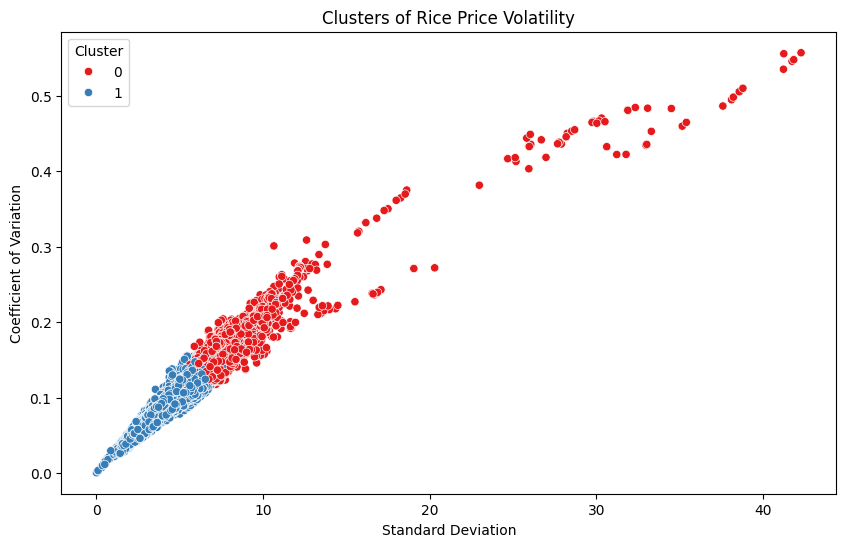

In [31]:
print("Clustered Data")
print(grouped.head(10))

# Visualize the clusters
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped, x='std', y='cv', hue='cluster', palette='Set1')
plt.title('Clusters of Rice Price Volatility')
plt.xlabel('Standard Deviation')
plt.ylabel('Coefficient of Variation')
plt.legend(title='Cluster')
plt.show()
